In [1]:
# Import the pandas library and alias it as 'pd' for easier access to data manipulation functions.
import pandas as pd
# Import the matplotlib library for creating visualizations, specifically for plotting, and alias it as 'plt'.
import matplotlib.pyplot as plt
# Import the seaborn library, which is built on top of matplotlib, for statistical data visualization, and alias it as 'sns'.
import seaborn as sns

In [2]:
# Load the dataset from the CSV file into a pandas DataFrame.
rd_budget_df = pd.read_csv('data/rd_data.csv')
# Print the entire DataFrame to view all rows and columns.
print(rd_budget_df)

   department  1976_gdp1790000000000.0  1977_gdp2028000000000.0  \
0         DHS                      NaN                      NaN   
1         DOC             8.190000e+08             8.370000e+08   
2         DOD             3.569600e+10             3.796700e+10   
3         DOE             1.088200e+10             1.374100e+10   
4         DOT             1.142000e+09             1.095000e+09   
5         EPA             9.680000e+08             9.660000e+08   
6         HHS             9.226000e+09             9.507000e+09   
7    Interior             1.152000e+09             1.082000e+09   
8        NASA             1.251300e+10             1.255300e+10   
9         NIH             8.025000e+09             8.214000e+09   
10        NSF             2.372000e+09             2.395000e+09   
11      Other             1.191000e+09             1.280000e+09   
12       USDA             1.837000e+09             1.796000e+09   
13         VA             4.040000e+08             3.740000e+0

### Dataset Overview

The dataset contains 14 rows and 43 columns. Each row represents a department, while each column corresponds to a specific year and its associated budget. However, the dataset is not in a tidy format, as the column headers represent values, rather than variable names. 

In a tidy dataset, each variable should be represented by a separate column. Therefore, the dataset needs to be reshaped to follow this convention, with each department's budget for each year structured as distinct columns.

In [3]:
# Gather columns into rows using melt function

# Reshape the DataFrame using the melt function. 'department' remains as the identifier, while the other columns (years) are 
# gathered into two new columns: 'year_gdp' (containing the year information) and 'budget' (containing the corresponding budget values).
rd_budget_long = rd_budget_df.melt(id_vars=["department"], var_name="year_gdp", value_name="budget")

# Print the reshaped DataFrame to see the transformation.
print(rd_budget_long)

    department                  year_gdp        budget
0          DHS   1976_gdp1790000000000.0           NaN
1          DOC   1976_gdp1790000000000.0  8.190000e+08
2          DOD   1976_gdp1790000000000.0  3.569600e+10
3          DOE   1976_gdp1790000000000.0  1.088200e+10
4          DOT   1976_gdp1790000000000.0  1.142000e+09
..         ...                       ...           ...
583        NIH  2017_gdp19177000000000.0  3.305200e+10
584        NSF  2017_gdp19177000000000.0  6.040000e+09
585      Other  2017_gdp19177000000000.0  1.553000e+09
586       USDA  2017_gdp19177000000000.0  2.625000e+09
587         VA  2017_gdp19177000000000.0  1.367000e+09

[588 rows x 3 columns]


### Reshaping the Dataset

This code reshapes the dataset using the `melt` function. The `department` column remains unchanged in the new format, while the year columns are combined into a single column named `year_gdp`. The values from the year columns are placed into a new column called `budget`.

After this transformation, the dataset now contains 588 rows and 3 columns. The first column represents the department, the second contains the year along with the GDP data, and the third column represents the corresponding budget. However, this is still not a tidy format, as the second column combines two variables (year and GDP).

To achieve a tidy format, we need to split the second column into two separate columns: one for the year and one for the GDP data.

In [4]:
# Split the "year_gdp" column at the underscore ("_") and take the first part (the year), storing it in a new column called "year".
rd_budget_long["year"] = rd_budget_long["year_gdp"].str.split("_").str[0]
# Split the "year_gdp" column at the underscore and take the second part (the GDP value), then remove the "gdp" prefix from it. Store the result in a new column called "gdp".
rd_budget_long["gdp"] = rd_budget_long["year_gdp"].str.split("_").str[1].str.replace("gdp", "", regex=False)
# Remove the original "year_gdp" column.
rd_budget_long = rd_budget_long.drop(columns=["year_gdp"])
# Convert "year" and "gdp" to numeric types. Any non-numeric values will be set to NaN (due to errors="coerce").
rd_budget_long["year"] = pd.to_numeric(rd_budget_long["year"], errors="coerce")
rd_budget_long["gdp"] = pd.to_numeric(rd_budget_long["gdp"], errors="coerce")
# Print the final reshaped DataFrame with the "year" and "gdp" columns properly formatted and numeric.
print(rd_budget_long)

    department        budget  year           gdp
0          DHS           NaN  1976  1.790000e+12
1          DOC  8.190000e+08  1976  1.790000e+12
2          DOD  3.569600e+10  1976  1.790000e+12
3          DOE  1.088200e+10  1976  1.790000e+12
4          DOT  1.142000e+09  1976  1.790000e+12
..         ...           ...   ...           ...
583        NIH  3.305200e+10  2017  1.917700e+13
584        NSF  6.040000e+09  2017  1.917700e+13
585      Other  1.553000e+09  2017  1.917700e+13
586       USDA  2.625000e+09  2017  1.917700e+13
587         VA  1.367000e+09  2017  1.917700e+13

[588 rows x 4 columns]


### Data Cleaning and Transformation

In this step, I cleaned the "year_gdp" column by splitting it into two parts using the `split()` function at the underscore ("_"). I extracted the first part (the year) and created a new column called "year". For the second part, I extracted the GDP value and removed the "gdp" prefix by replacing it with an empty string. 

To avoid redundancy, I dropped the original "year_gdp" column using the `drop()` method. Next, I converted the "year" and "gdp" columns to numeric types so they can be used for calculations and other operations in future analysis.

While this format is now cleaner, ideally, I want to reshape it so that years become column headers and GDP values are displayed as the corresponding data. Although this approach might be more convenient for visualization, it does not align with the principles of tidy data. In the next lines of code, I will show how the dataset might have looked if I had reshaped it this way. However, we will not be using this format, as it does not adhere to the tidy data principles.

In [7]:
# Reshape the data by pivoting the 'year' column into individual columns and 'budget' as the values

rd_budget_messy = rd_budget_long.pivot(index="department", columns="year", values="budget")
rd_budget_messy.head()

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
department,,,,,,,,,,,,,,,,,,,,,
DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.155000e+09,1.258000e+09,1.009000e+09,8.480000e+08,5.270000e+08,7.370000e+08,1.092000e+09,9.600000e+08,6.020000e+08,7.350000e+08
DOC,8.190000e+08,8.370000e+08,8.710000e+08,9.520000e+08,9.450000e+08,8.290000e+08,6.930000e+08,7.000000e+08,7.550000e+08,7.890000e+08,...,1.379000e+09,1.594000e+09,1.521000e+09,1.357000e+09,1.373000e+09,1.397000e+09,1.641000e+09,1.596000e+09,1.730000e+09,1.824000e+09
DOD,3.569600e+10,3.796700e+10,3.702200e+10,3.717400e+10,3.700500e+10,4.173700e+10,4.689300e+10,5.100800e+10,5.813900e+10,6.441600e+10,...,9.424700e+10,9.352700e+10,9.432500e+10,8.822000e+10,8.154300e+10,7.058300e+10,7.034100e+10,6.952200e+10,7.521300e+10,5.186200e+10
DOE,1.088200e+10,1.374100e+10,1.566300e+10,1.561200e+10,1.522600e+10,1.479800e+10,1.216000e+10,1.112900e+10,1.173100e+10,1.204300e+10,...,1.134300e+10,1.182300e+10,1.232900e+10,1.190200e+10,1.183900e+10,1.152800e+10,1.268600e+10,1.503300e+10,1.550400e+10,1.503200e+10
DOT,1.142000e+09,1.095000e+09,1.156000e+09,1.004000e+09,1.048000e+09,9.780000e+08,7.020000e+08,8.000000e+08,1.018000e+09,8.850000e+08,...,1.016000e+09,1.062000e+09,1.221000e+09,1.064000e+09,1.007000e+09,8.810000e+08,8.430000e+08,9.260000e+08,9.100000e+08,9.360000e+08


### Data Reshaping and Tidy Data Principles

The table above may be useful for certain types of data analysis, modeling, or visualizations. However, it does not adhere to the principles of tidy data, where each variable should have its own column. According to tidy data principles, each observation should be represented as a row, and each variable should be represented as a column. Therefore, we will stick with the previous table as the tidy format.

Next, I will focus on identifying any missing values in the dataset.

In [6]:
# Calculate the number of missing values for each variable (column) in the DataFrame

# Use the 'isnull()' function to check for missing values (NaN) in the DataFrame, then sum the missing values per column.
missing_per_variable = rd_budget_long.isnull().sum()
# Print the total number of missing values for each variable to inspect the result.
print(missing_per_variable)

department     0
budget        26
year           0
gdp            0
dtype: int64


In [ ]:
# Calculate the number of missing values for each department (row) in the DataFrame

# Use the reshaped "messy" table, where years are columns and budgets are the values, since the missing values are only present in the "budget" column 
# to find the department with missing values.
missing_per_department = rd_budget_messy.isnull().sum(axis=1)
print(missing_per_department)

department
DHS         26
DOC          0
DOD          0
DOE          0
DOT          0
EPA          0
HHS          0
Interior     0
NASA         0
NIH          0
NSF          0
Other        0
USDA         0
VA           0
dtype: int64


In [ ]:
# Calculate the total number of missing values in the entire DataFrame

# The first 'sum()' calculates the number of missing values in each column (variable), 
# and the second 'sum()' adds up those values to get the total number of missing values in the entire DataFrame.
total_missing = rd_budget_long.isnull().sum().sum()
# Print the total count of missing values.
print("Total missing values:", total_missing)

Total missing values: 26


### Missing Values Exploration

I have explored the missing values across different dimensions: columns, departments, and in total. It turns out that the only missing values are found in the "budget" column for the DHS department. The data for this department starts in 2002, which is why there are missing values for the years prior to this.

Overall, the data is clean, with only a few missing values in a specific department and column. For the purpose of this analysis, we will replace these missing values with 0 to avoid any issues in further calculations or visualizations.

In [10]:
# Replace all missing values (NaN) with 0 in the DataFrame, modifying the DataFrame in place
rd_budget_long.fillna(0, inplace=True)
# Display the first 5 rows of the DataFrame.
rd_budget_long.head()

,department,budget,year,gdp
0,DHS,0.000000e+00,1976,1.790000e+12
1,DOC,8.190000e+08,1976,1.790000e+12
2,DOD,3.569600e+10,1976,1.790000e+12
3,DOE,1.088200e+10,1976,1.790000e+12
4,DOT,1.142000e+09,1976,1.790000e+12


### Conclusion of Data Tidying

At this point, we have successfully tidied the dataset by reshaping it into a more structured format. We have addressed missing values, cleaned up columns, and ensured that the data adheres to tidy data principles. The dataset is now ready for further analysis.

Next, we will shift our focus to visualizing the data. Visualization will be a key tool in making the analysis easier to interpret and communicate.

# Visualizations & Pivot Tables

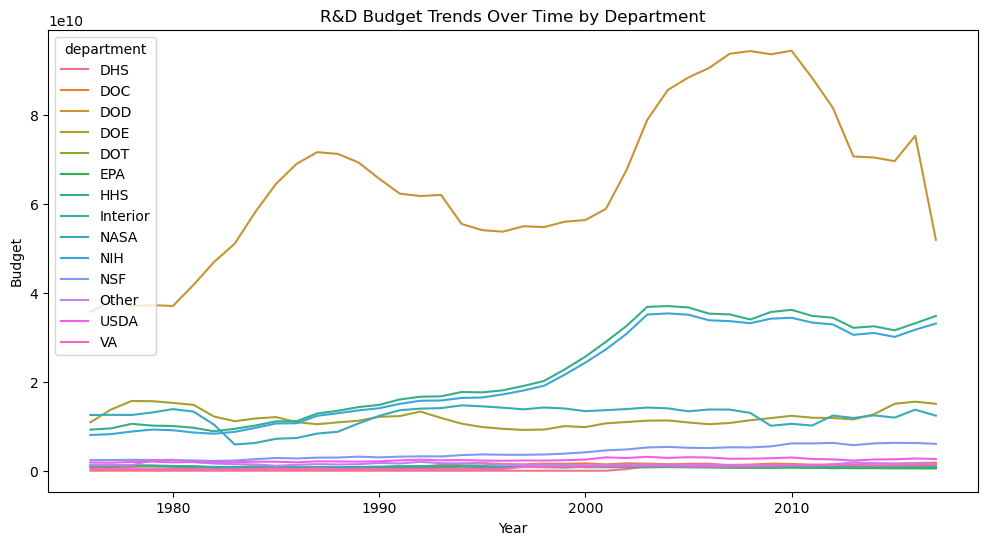

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=rd_budget_long, x="year", y="budget", hue="department")
plt.title("R&D Budget Trends Over Time by Department")
plt.xlabel("Year")
plt.ylabel("Budget")
plt.show()

/var/folders/vk/yf7z5gmx1ngblj686qfff1j00000gn/T/ipykernel_7878/1958580340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_budget_by_department, x="budget", y="department", palette="viridis")


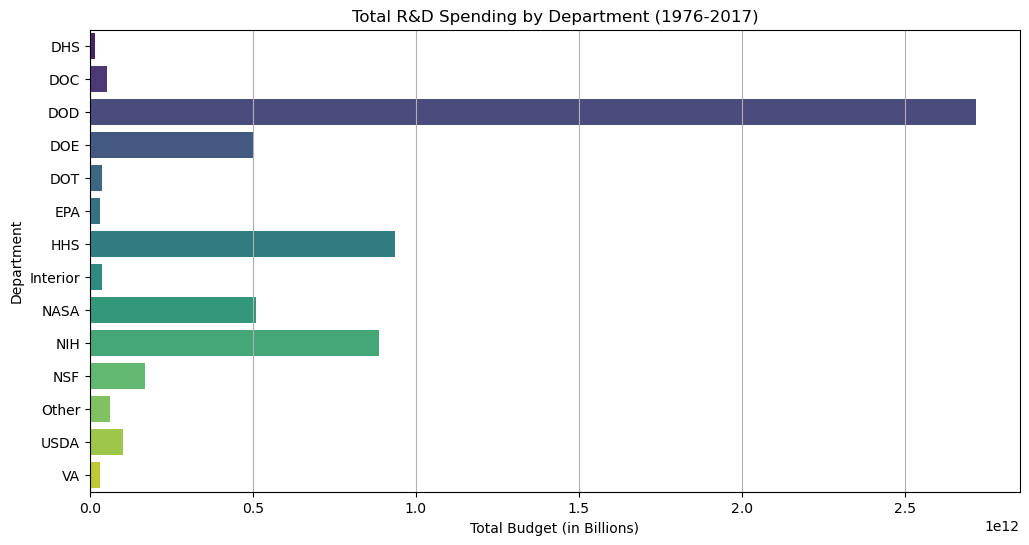

In [16]:
plt.figure(figsize=(12, 6))
total_budget_by_department = rd_budget_long.groupby("department")["budget"].sum().reset_index()
sns.barplot(data=total_budget_by_department, x="budget", y="department", palette="viridis")
plt.title("Total R&D Spending by Department (1976-2017)")
plt.xlabel("Total Budget (in Billions)")
plt.ylabel("Department")
plt.grid(axis="x")
plt.show()

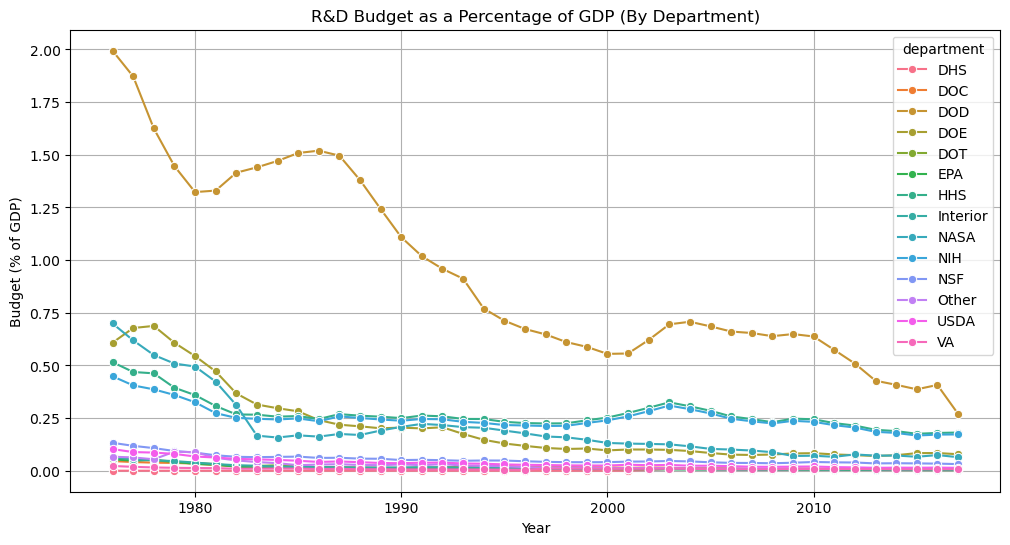

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=rd_budget_long, x="year", y=rd_budget_long["budget"] / rd_budget_long["gdp"] * 100, hue="department", marker="o")
plt.title("R&D Budget as a Percentage of GDP (By Department)")
plt.xlabel("Year")
plt.ylabel("Budget (% of GDP)")
plt.grid(True)
plt.show()

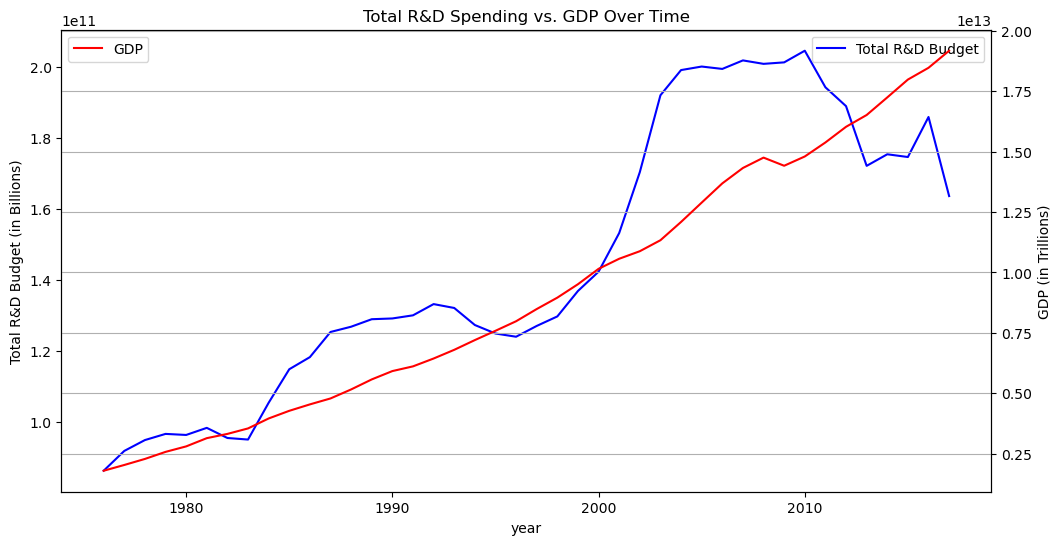

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=rd_budget_long.groupby("year")["budget"].sum().reset_index(), x="year", y="budget", label="Total R&D Budget", color="blue")
ax2 = plt.twinx()
sns.lineplot(data=rd_budget_long.groupby("year")["gdp"].mean().reset_index(), x="year", y="gdp", label="GDP", ax=ax2, color="red")
ax.set_ylabel("Total R&D Budget (in Billions)")
ax2.set_ylabel("GDP (in Trillions)")
plt.title("Total R&D Spending vs. GDP Over Time")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

### Pivot Table

In [ ]:

pivot_table = rd_budget_long.pivot_table(values="budget", index="department", aggfunc="sum") / rd_budget_long["gdp"].mean() * 100
print("\nTotal R&D Budget as % of GDP per Department:\n", pivot_table)



Total R&D Budget as % of GDP per Department:
                budget
department           
DHS          0.173491
DOC          0.563731
DOD         29.610275
DOE          5.439733
DOT          0.420125
EPA          0.343516
HHS         10.206560
Interior     0.412245
NASA         5.557323
NIH          9.666774
NSF          1.848804
Other        0.684242
USDA         1.089839
VA           0.335941


In [21]:
pivot_table = rd_budget_long.pivot_table(values="budget", index="department", aggfunc="sum")
print("\nTotal R&D Budget per Department:\n", pivot_table)


Total R&D Budget per Department:
                   budget
department              
DHS         1.591800e+10
DOC         5.172300e+10
DOD         2.716778e+12
DOE         4.991020e+11
DOT         3.854700e+10
EPA         3.151800e+10
HHS         9.364640e+11
Interior    3.782400e+10
NASA        5.098910e+11
NIH         8.869380e+11
NSF         1.696300e+11
Other       6.278000e+10
USDA        9.999400e+10
VA          3.082300e+10


In [23]:
pivot_table_transposed = rd_budget_long.pivot_table(values="budget", index="department", columns="year", aggfunc="sum")

# Display the pivot table
print("\nTotal R&D Budget per Department (Rows) per Year (Columns):\n", pivot_table_transposed)



Total R&D Budget per Department (Rows) per Year (Columns):
 year                1976          1977          1978          1979  \
department                                                           
DHS         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
DOC         8.190000e+08  8.370000e+08  8.710000e+08  9.520000e+08   
DOD         3.569600e+10  3.796700e+10  3.702200e+10  3.717400e+10   
DOE         1.088200e+10  1.374100e+10  1.566300e+10  1.561200e+10   
DOT         1.142000e+09  1.095000e+09  1.156000e+09  1.004000e+09   
EPA         9.680000e+08  9.660000e+08  1.175000e+09  1.102000e+09   
HHS         9.226000e+09  9.507000e+09  1.053300e+10  1.012700e+10   
Interior    1.152000e+09  1.082000e+09  1.125000e+09  1.176000e+09   
NASA        1.251300e+10  1.255300e+10  1.251600e+10  1.307900e+10   
NIH         8.025000e+09  8.214000e+09  8.802000e+09  9.243000e+09   
NSF         2.372000e+09  2.395000e+09  2.446000e+09  2.404000e+09   
Other       1.191000e+09  1.2